In [394]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
from sklearn.model_selection import train_test_split
eps=np.finfo(float).eps
from binarytree import tree,Node
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
import copy
import collections
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [395]:
def cosine_similarity(x, y):
    return 1-np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [396]:
def Manhattan_distance(x, y): 
#row by row i.e all features resultant euclid distance in single line
    return (np.sum(abs(x - y)))


In [397]:
def euclidean_distance(x, y): 
#row by row i.e all features resultant euclid distance in single line
    return np.sqrt(np.sum((x - y) ** 2))


In [398]:
names=['sepal-length','sepal-width','petal-length','petal-width','Class']
df=pd.read_csv("Iris/Iris.csv",names=names)

In [399]:
X =df.drop(['Class'],axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [400]:
df=X_train
y_train=list(y_train)

In [401]:
def cosine(Xtest,k):
    y_res=[]
    for index,row in X_test.iterrows():
        result=[]
        for index1,row1 in df.iterrows():
                result.append(cosine_similarity(row,row1))
        df1=pd.DataFrame(
        {
            'dist':result,
            'class':y_train
        })
        df1=df1.sort_values(by=['dist'])
        count=0;
#         k=5
        classVote={}
        max1=0
        res=""
        for index1,row1 in df1.iterrows():
            capital=row1['class']
            count=count+1
            if  capital in classVote:
                classVote[capital] = classVote[capital]+1
            else:
                classVote[capital]=1
            if classVote[capital]>=max1:
                res=capital
                max1=classVote[capital]
            if count==k:
                break;
        y_res.append(res)
    return y_res

In [402]:
def Manhat(Xtest,k):
    y_res=[]
    for index,row in X_test.iterrows():
        result=[]
        for index1,row1 in df.iterrows():
                result.append(Manhattan_distance(row,row1))
        df1=pd.DataFrame(
        {
            'dist':result,
            'class':y_train
        })
        df1=df1.sort_values(by=['dist'])
        count=0;
#         k=5
        classVote={}
        max1=0
        res=""
        for index1,row1 in df1.iterrows():
            capital=row1['class']
            count=count+1
            if  capital in classVote:
                classVote[capital] = classVote[capital]+1
            else:
                classVote[capital]=1
            if classVote[capital]>=max1:
                res=capital
                max1=classVote[capital]
            if count==k:
                break;
        y_res.append(res)
    return y_res

In [403]:
def euclid(Xtest,k):
    y_res=[]
    for index,row in X_test.iterrows():
        result=[]
        for index1,row1 in df.iterrows():
                result.append(euclidean_distance(row,row1))
        df1=pd.DataFrame(
        {
            'dist':result,
            'class':y_train
        })
        df1=df1.sort_values(by=['dist'])
        count=0;
#         k=5
        classVote={}
        max1=0
        res=""
        for index1,row1 in df1.iterrows():
            capital=row1['class']
            count=count+1
            if  capital in classVote:
                classVote[capital] = classVote[capital]+1
            else:
                classVote[capital]=1
            if classVote[capital]>=max1:
                res=capital
                max1=classVote[capital]
            if count==k:
                break;
        y_res.append(res)
    return y_res


In [404]:
def predict(Xtest,k):
    yeuclid=euclid(Xtest,k)
    ycos=cosine(Xtest,k)
    yman=Manhat(Xtest,k)
    return yeuclid,ycos,yman

In [405]:
yaxis=[]
yaxis1=[]
yman=[]
for i in range(1,11):
    y_res,y_cos,y_man=predict(X_test,i)
#     print(confusion_matrix(y_test, y_res))  
#     print(classification_report(y_test, y_res)) 
#     print(accuracy_score(y_test,y_res))
    yaxis.append(accuracy_score(y_test,y_res))
    yaxis1.append(accuracy_score(y_test,y_cos))
    yman.append(accuracy_score(y_test,y_man))

Text(0.5, 1.0, 'Accuracy vs Kvalue')

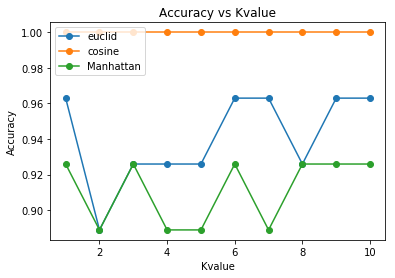

In [406]:
x_axis = [i for i in range(1,11)]
# figure()

fig, ax = plt.subplots()
# y_axis=
# plt.ylim(0.10,0.13)
ax.plot(x_axis, yaxis, label="euclid",marker="o")
ax.plot(x_axis, yaxis1, label="cosine",marker="o")
ax.plot(x_axis, yman, label="Manhattan",marker="o")
# t = np.arange(-5.0, 5.0, 0.01)
ax.legend(loc=2) # upper left corner
ax.set_xlabel("Kvalue", fontsize=10)
ax.set_ylabel("Accuracy", fontsize=10)
ax.set_title('Accuracy vs Kvalue')

In [407]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# knn.score(X_train, y_test)
y_pred =knn.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0  7  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.89      0.89      0.89         9

      micro avg       0.93      0.93      0.93        27
      macro avg       0.92      0.92      0.92        27
   weighted avg       0.93      0.93      0.93        27

0.9259259259259259
